In [1]:
import heapq

class Event:
    '''
    Store the properties of one event in the Schedule class defined below. Each
    event has a time at which it needs to run, a function to call when running
    the event, along with the arguments and keyword arguments to pass to that
    function.
    '''
    def __init__(self, timestamp, function, *args, **kwargs):
        self.timestamp = timestamp
        self.function = function
        self.args = args
        self.kwargs = kwargs

    def __lt__(self, other):
        '''
        This overloads the less-than operator in Python. We need it so the
        priority queue knows how to compare two events. We want events with
        earlier (smaller) times to go first.
        '''
        return self.timestamp < other.timestamp

    def run(self, schedule):
        '''
        Run an event by calling the function with its arguments and keyword
        arguments. The first argument to any event function is always the
        schedule in which events are being tracked. The schedule object can be
        used to add new events to the priority queue.
        '''
        self.function(schedule, *self.args, **self.kwargs)


class Schedule:
    '''
    Implement an event schedule using a priority queue. You can add events and
    run the next event.
    
    The `now` attribute contains the time at which the last event was run.
    '''
    
    def __init__(self):
        self.now = 0  # Keep track of the current simulation time
        self.priority_queue = []  # The priority queue of events to run
    
    def add_event_at(self, timestamp, function, *args, **kwargs):
        # Add an event to the schedule at a particular point in time.
        heapq.heappush(
            self.priority_queue,
            Event(timestamp, function, *args, **kwargs))
    
    def add_event_after(self, interval, function, *args, **kwargs):
        # Add an event to the schedule after a specified time interval.
        self.add_event_at(self.now + interval, function, *args, **kwargs)
    
    def next_event_time(self):
        return self.priority_queue[0].timestamp

    def run_next_event(self):
        # Get the next event from the priority queue and run it.
        event = heapq.heappop(self.priority_queue)
        self.now = event.timestamp
        event.run(self)
        
    def __repr__(self):
        return (
            f'Schedule() at time {self.now} ' +
            f'with {len(self.priority_queue)} events in the queue')
    
    def print_events(self):
        print(repr(self))
        for event in sorted(self.priority_queue):
            print(f'   {event.timestamp}: {event.function.__name__}')

In [2]:
# M/D/1 queue

import scipy.stats as sts


class Queue:
    def __init__(self, service_rate):
        # Store the deterministic service time for an M/D/1 queue
        self.service_time = 1 / service_rate
        # We start with an empty queue and the server not busy
        self.people_in_queue = 0
        self.people_being_served = 0

    def add_customer(self, schedule):
        # Add the customer to the queue
        self.people_in_queue += 1
        if self.people_being_served < 1:
            # This customer can be served immediately
            schedule.add_event_after(0, self.start_serving_customer)
            
    def start_serving_customer(self, schedule):
        # Move the customer from the queue to a server
        self.people_in_queue -= 1
        self.people_being_served += 1
        # Schedule when the server will be done with the customer
        schedule.add_event_after(
            self.service_time,
            self.finish_serving_customer)
            
    def finish_serving_customer(self, schedule):
        # Remove the customer from the server
        self.people_being_served -= 1
        if self.people_in_queue > 0:
            # There are more people in the queue so serve the next customer
            schedule.add_event_after(0, self.start_serving_customer)


class BusSystem:
    
    def __init__(self, arrival_rate, service_rate):
        self.queue = Queue(service_rate)
        self.arrival_distribution = sts.expon(scale=1/arrival_rate)

    def add_customer(self, schedule):
        # Add this customer to the queue
        self.queue.add_customer(schedule)
        # Schedule when to add another customer
        schedule.add_event_after(
            self.arrival_distribution.rvs(),
            self.add_customer)

    def run(self, schedule):
        # Schedule when the first customer arrives
        schedule.add_event_after(
            self.arrival_distribution.rvs(),
            self.add_customer)
        

def run_simulation(arrival_rate, service_rate, run_until):
    schedule = Schedule()
    bus_system = BusSystem(arrival_rate, service_rate)
    bus_system.run(schedule)
    while schedule.next_event_time() < run_until:
        schedule.run_next_event()
    return bus_system

In [3]:
# Run a short test
bus_system = run_simulation(arrival_rate = 0.8, service_rate = 1, run_until = 100)
print(f'There are {bus_system.queue.people_in_queue} people in the queue')

There are 2 people in the queue


# First experiment:

- there are 2 people in the queue after 100 trials

In [7]:
bus_system = run_simulation(arrival_rate = 0.8, service_rate = 1, run_until = 100)
print(f'There are {for i in range(100) bus_system.queue.people_in_queue} people in the queue')


SyntaxError: invalid syntax (<fstring>, line 1)

In [13]:
for i in range(100):
    bus_system = run_simulation(arrival_rate = 0.8, service_rate = 1, run_until = 100)
    #people_waiting = []
    people_waiting.append(bus_system.queue.people_in_queue)
    print(f'There are {bus_system.queue.people_in_queue} people in the queue')

There are 2 people in the queue
There are 1 people in the queue
There are 0 people in the queue
There are 2 people in the queue
There are 0 people in the queue
There are 2 people in the queue
There are 1 people in the queue
There are 4 people in the queue
There are 1 people in the queue
There are 0 people in the queue
There are 1 people in the queue
There are 3 people in the queue
There are 2 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 3 people in the queue
There are 0 people in the queue
There are 1 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 1 people in the queue
There are 3 people in the queue
There are 3 people in the queue
There are 0 people in the queue
There are 4 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 5 people in the queue
There are 0 people in the queue
There are 1 people in the queue
There are 2 people in the queue
There ar

In [15]:
print(people_waiting)

[0, 2, 1, 0, 2, 0, 2, 1, 4, 1, 0, 1, 3, 2, 0, 0, 3, 0, 1, 0, 0, 1, 3, 3, 0, 4, 0, 0, 5, 0, 1, 2, 0, 1, 0, 1, 0, 0, 2, 0, 5, 0, 4, 0, 4, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 2, 1, 1, 0, 0, 0, 3, 2, 1, 0, 3, 0, 0, 0, 0, 1, 0, 0, 2, 1, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 5, 4, 0, 4, 0, 1, 2, 0, 0, 1, 0, 0, 1, 1, 3, 0]


(array([52., 21., 11.,  0.,  8.,  6.,  3.]),
 array([0.        , 0.71428571, 1.42857143, 2.14285714, 2.85714286,
        3.57142857, 4.28571429, 5.        ]),
 <a list of 7 Patch objects>)

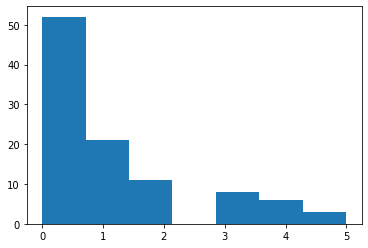

In [22]:
import matplotlib.pyplot as plt
plt.hist(people_waiting, bins = 7)

In [23]:
import scipy.stats as sts
import numpy as np

m = np.mean(people_waiting)
print('Sample mean:', m)
t = sts.sem(people_waiting)
print('Standard error of the mean:', t)
print('95% confidence interval of population mean:', [m + 1.96*t, m - 1.96*t])

Sample mean: 1.0495049504950495
Standard error of the mean: 0.13957235791450376
95% confidence interval of population mean: [1.323066772007477, 0.7759431289826222]


# Second experiment

In [33]:
for i in range(1000):
    bus_system = run_simulation(arrival_rate = 0.8, service_rate = 1, run_until = 100)
    #waiting = []
    waiting.append(bus_system.queue.people_in_queue)
    print(f'There are {bus_system.queue.people_in_queue} people in the queue')

There are 0 people in the queue
There are 3 people in the queue
There are 0 people in the queue
There are 2 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 1 people in the queue
There are 5 people in the queue
There are 2 people in the queue
There are 1 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 1 people in the queue
There are 0 people in the queue
There are 2 people in the queue
There are 2 people in the queue
There are 0 people in the queue
There are 2 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 3 people in the queue
There are 0 people in the queue
There ar

There are 7 people in the queue
There are 2 people in the queue
There are 0 people in the queue
There are 1 people in the queue
There are 0 people in the queue
There are 3 people in the queue
There are 7 people in the queue
There are 3 people in the queue
There are 1 people in the queue
There are 1 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 2 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 2 people in the queue
There are 0 people in the queue
There are 8 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 1 people in the queue
There are 1 people in the queue
There are 7 people in the queue
There are 3 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 2 people in the queue
There ar

There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 6 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 3 people in the queue
There are 2 people in the queue
There are 4 people in the queue
There are 3 people in the queue
There are 4 people in the queue
There are 0 people in the queue
There are 2 people in the queue
There are 0 people in the queue
There are 1 people in the queue
There are 1 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 2 people in the queue
There are 4 people in the queue
There are 1 people in the queue
There are 2 people in the queue
There are 4 people in the queue
There are 1 people in the queue
There are 0 people in the queue
There are 3 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There ar

There are 3 people in the queue
There are 1 people in the queue
There are 0 people in the queue
There are 3 people in the queue
There are 0 people in the queue
There are 1 people in the queue
There are 0 people in the queue
There are 2 people in the queue
There are 3 people in the queue
There are 1 people in the queue
There are 0 people in the queue
There are 6 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 2 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 1 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 7 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 3 people in the queue
There are 0 people in the queue
There are 2 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 2 people in the queue
There ar

(array([769., 136.,  56.,  33.,   3.,   2.,   2.]),
 array([ 0.        ,  2.28571429,  4.57142857,  6.85714286,  9.14285714,
        11.42857143, 13.71428571, 16.        ]),
 <a list of 7 Patch objects>)

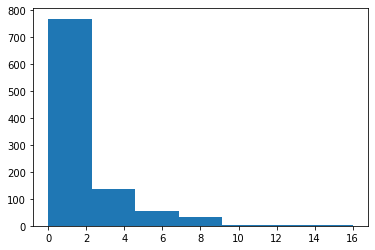

In [37]:
plt.hist(waiting, bins = 7)

In [38]:
m = np.mean(waiting)
print('Sample mean:', m)
t = sts.sem(waiting)
print('Standard error of the mean:', t)
print('95% confidence interval of population mean:', [m + 1.96*t, m - 1.96*t])

Sample mean: 1.5394605394605394
Standard error of the mean: 0.06743992263878854
95% confidence interval of population mean: [1.6716427878325648, 1.407278291088514]


# Comparing the results

- Histograms: the shapes of the histograms are similar, meaning that they are skewed to the right; with more trials, we see less extreme cases
- Average queue length: with 100 trials, it's 1.04 and with 1000 trials it's 1.53. It means that with more trials, the queue length in larger by 0.49 people on average
- Confidence intervals: the CI for 1000 trials is way more narrow than the one for 100 trials, meaning that we are more confident about the queue length due to tighter bounds of the interval. 

# Different values of the arrival rate

In [41]:
for i in range(100):
    bus_system = run_simulation(arrival_rate = 0.2, service_rate = 1, run_until = 100)
    #low_arrival = []
    low_arrival.append(bus_system.queue.people_in_queue)
    print(f'There are {bus_system.queue.people_in_queue} people in the queue')

There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 1 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There ar

In [48]:
m = np.mean(low_arrival)
print('Sample mean:', m)
t = sts.sem(low_arrival)
print('Standard error of the mean:', t)
print('95% confidence interval of population mean:', [m + 1.96*t, m - 1.96*t])

Sample mean: 0.0297029702970297
Standard error of the mean: 0.01697666158364579
95% confidence interval of population mean: [0.06297722700097544, -0.0035712864069160424]


In [50]:
y = [5,10,15,20,25]
plt.figure()
plt.errorbar(low arrival, y, t) # Make an error plot
plt.show()

SyntaxError: invalid syntax (<ipython-input-50-b969537db824>, line 3)

In [44]:
for i in range(100):
    bus_system = run_simulation(arrival_rate = 0.7, service_rate = 1, run_until = 100)
    #med_arrival = []
    med_arrival.append(bus_system.queue.people_in_queue)
    print(f'There are {bus_system.queue.people_in_queue} people in the queue')

There are 1 people in the queue
There are 2 people in the queue
There are 1 people in the queue
There are 3 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 1 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 3 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 1 people in the queue
There are 1 people in the queue
There are 2 people in the queue
There are 0 people in the queue
There are 3 people in the queue
There are 1 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 0 people in the queue
There are 5 people in the queue
There are 2 people in the queue
There ar

In [47]:
m = np.mean(med_arrival)
print('Sample mean:', m)
t = sts.sem(med_arrival)
print('Standard error of the mean:', t)
print('95% confidence interval of population mean:', [m + 1.96*t, m - 1.96*t])

Sample mean: 0.7623762376237624
Standard error of the mean: 0.1170161322985676
95% confidence interval of population mean: [0.9917278569289549, 0.5330246183185698]


In [45]:
for i in range(100):
    bus_system = run_simulation(arrival_rate = 1.3, service_rate = 1, run_until = 100)
    #high_arrival = []
    high_arrival.append(bus_system.queue.people_in_queue)
    print(f'There are {bus_system.queue.people_in_queue} people in the queue')

There are 40 people in the queue
There are 22 people in the queue
There are 41 people in the queue
There are 25 people in the queue
There are 27 people in the queue
There are 39 people in the queue
There are 31 people in the queue
There are 31 people in the queue
There are 35 people in the queue
There are 25 people in the queue
There are 26 people in the queue
There are 17 people in the queue
There are 32 people in the queue
There are 13 people in the queue
There are 17 people in the queue
There are 23 people in the queue
There are 47 people in the queue
There are 8 people in the queue
There are 27 people in the queue
There are 34 people in the queue
There are 34 people in the queue
There are 47 people in the queue
There are 28 people in the queue
There are 20 people in the queue
There are 26 people in the queue
There are 31 people in the queue
There are 34 people in the queue
There are 49 people in the queue
There are 36 people in the queue
There are 34 people in the queue
There are 2

In [46]:
m = np.mean(high_arrival)
print('Sample mean:', m)
t = sts.sem(high_arrival)
print('Standard error of the mean:', t)
print('95% confidence interval of population mean:', [m + 1.96*t, m - 1.96*t])

Sample mean: 30.92079207920792
Standard error of the mean: 1.132829906776168
95% confidence interval of population mean: [33.14113869648921, 28.70044546192663]


I wasn't able to plot the error plot, but by looking at the sample means, we know that the average queue length exceeds 5 people only in the high arrival rate(1.3) case - it is 30.9.

# Reflection

**#EmpiricalAnalysis:**

I analyzed the results from simulations using the sample mean, confidence intervals and standard errors. I used histograms to visually assess the sample distributions. In the third part, I used the same numbers of trials but with different arrival rates, thus keeping the results consistent.

**#Professionalism:**

I followed the guidelines from the pre-class work, created appropriate vizualizations and addressed all the questions from PCW prompts.